In [2]:
!pip install qrcode[pil]

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

print("Setup Complete")

zsh:1: no matches found: qrcode[pil]
Setup Complete


# DATA TRANSFORMATION

In [2]:
sales = pd.read_csv('/Users/pratikjagtap/Downloads/business.retailsales.csv')


In [3]:
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


In [4]:
sales.describe()


,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


# DATA CLEANING

In [5]:
sales.isna().sum()

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64

In [6]:
sales.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


In [7]:
# Rename columns to make them easier to work with
sales.columns = ['product_type', 'net_qty', 'gross_sales', 'discounts', 'returns', 'total_net_sales']
sales

,product_type,net_qty,gross_sales,discounts,returns,total_net_sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.00,12732.00
1,Basket,13,3744.0,-316.80,0.00,3427.20
2,Basket,12,3825.0,-201.60,-288.00,3335.40
3,Basket,17,3035.0,-63.25,0.00,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.00,2652.64
...,...,...,...,...,...,...
1770,Kitchen,0,28.0,-2.81,-25.19,0.00
1771,Jewelry,0,28.0,0.00,-28.00,0.00
1772,Basket,0,116.0,-23.20,-92.80,0.00
1773,Kitchen,0,16.5,0.00,-16.50,0.00


In [8]:
# Group sales by product_type
grouped_sales = sales.groupby('product_type').sum().sort_values('gross_sales', ascending = False).reset_index()
grouped_sales

,product_type,net_qty,gross_sales,discounts,returns,total_net_sales
0,Basket,1461,143815.50,-4584.42,-4439.69,134791.39
1,Art & Sculpture,1427,90316.60,-2955.82,-2879.93,84480.85
2,Jewelry,991,31048.00,-965.85,-509.20,29572.95
3,Home Decor,404,27114.55,-991.21,-423.35,25699.99
4,Kitchen,809,16096.00,-431.11,-328.07,15336.82
5,Christmas,575,15476.00,-345.19,-670.00,14460.81
6,Soapstone,199,4795.50,-96.91,-69.50,4629.09
7,Accessories,84,3892.40,-107.02,0.00,3785.38
8,Kids,140,3838.00,-116.66,0.00,3721.34
9,Recycled Art,99,3792.80,-88.64,0.00,3704.16


# DATA ANALYSIS

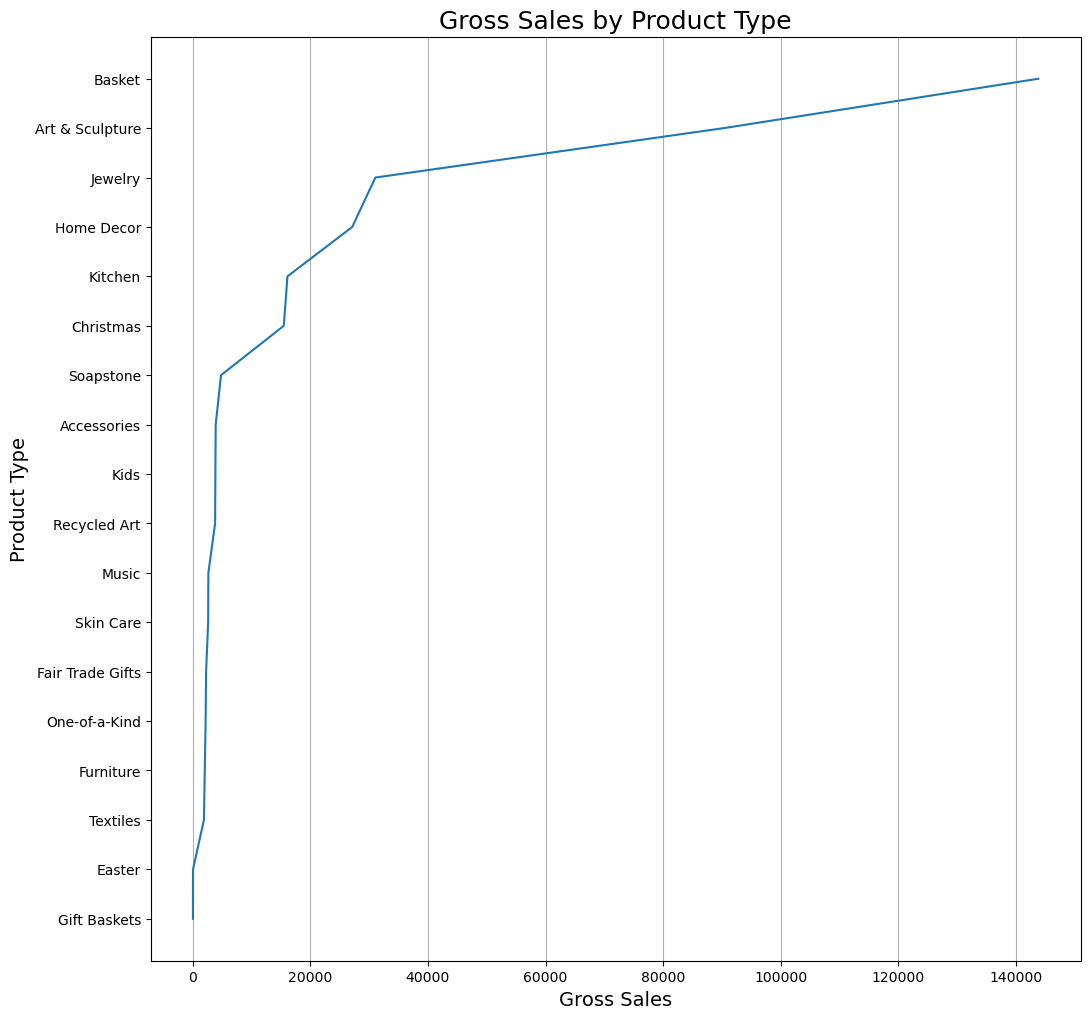

In [9]:
plt.figure(figsize = (12, 12))
sns.lineplot(x = grouped_sales.sort_values('gross_sales', ascending = False)['gross_sales'],
           y = grouped_sales.sort_values('gross_sales', ascending = False)['product_type'])
plt.title('Gross Sales by Product Type', fontsize = 18)
plt.xlabel('Gross Sales', fontsize = 14)
plt.ylabel('Product Type', fontsize = 14)
plt.grid(axis = 'x')

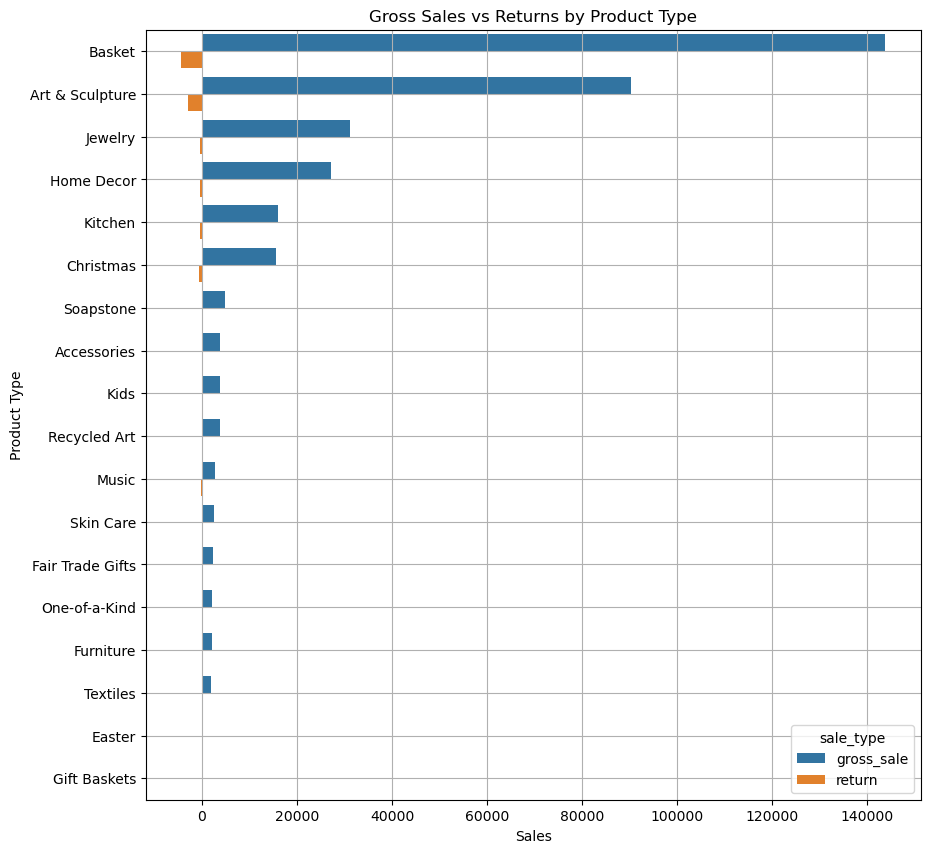

In [18]:
# Classify sales and returns
gross_sales = sales.loc[:, ['product_type', 'gross_sales']].groupby('product_type').sum()
gross_sales.rename(columns = {'gross_sales': 'sales'}, inplace = True)
gross_sales['sale_type'] = 'gross_sale'

returns = sales.loc[:, ['product_type', 'returns']].groupby('product_type').sum()
returns.rename(columns = {'returns': 'sales'}, inplace = True)
returns['sale_type'] = 'return'

combined_sales_returns = pd.concat([gross_sales, returns]).reset_index()

# Create barplot comparing gross sales vs returns
plt.figure(figsize = (10, 10))
sns.barplot(x = 'sales', 
           y = 'product_type',
           hue = 'sale_type',
           data = combined_sales_returns.sort_values(['sales', 'sale_type'], ascending = [False, False]))
plt.title('Gross Sales vs Returns by Product Type')
plt.xlabel('Sales')
plt.ylabel('Product Type')
plt.grid()

In [16]:

non_numeric_columns = sales.select_dtypes(exclude=['float64', 'int64']).columns
sales_numeric = sales.drop(columns=non_numeric_columns)

corr_matrix = sales_numeric.corr(min_periods=3)


Text(0.5, 1.0, 'Correlation Between Stats')

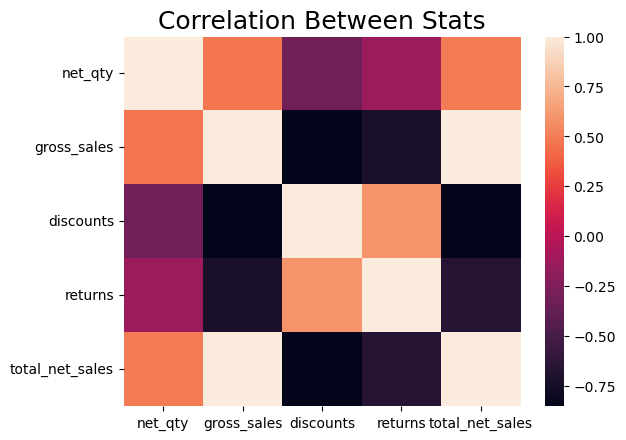

In [17]:
sns.heatmap(corr_matrix,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title('Correlation Between Stats', fontsize = 18)